In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Dataset
#To demonstrate various clustering algorithms in python, the Wine dataset will be used which has three classes in the dependent variable and using this dataset clusters will be formed.

from sklearn import datasets
wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data)
wine_data.columns = wine.feature_names
wine_data['Type']=wine.target
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#Preparing Data
#Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment. The iloc function is used to get the features we require. We also use .values function to get an array of the dataset.
#(Note that we transformed the dataset to an array so that we can plot the graphs of the clusters).

wine_X = wine_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [4]:

# Now we will separate the target variable from the original dataset and again convert it to an array by using numpy.

wine_Y = wine_data['Type']
wine_Y = np.array(wine_Y)

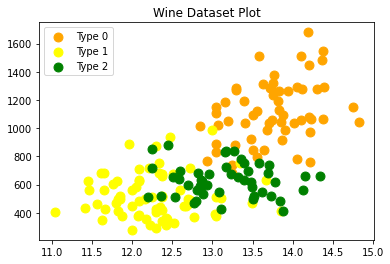

In [5]:
#Wine dataset clustering plot
# Visualise Classes
#In this Wine dataset, we have three classes. We visualise these classes in a 2-D graph.

plt.scatter(wine_X[wine_Y == 0, 0], wine_X[wine_Y == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[wine_Y == 1, 0], wine_X[wine_Y == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[wine_Y == 2, 0], wine_X[wine_Y == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title("Wine Dataset Plot")
plt.legend()

In [6]:
# Wine dataset for KMeans

'''Kmeans is a kind of Unsupervised type of Clustering . It basically takes input from Dataset and predicts the clusters 
accordinly'''

from sklearn.cluster import KMeans

In [7]:

# Calculating WCSS (within-cluster sums of squares) 

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

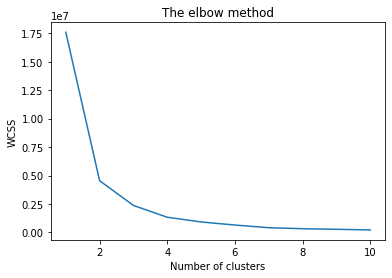

In [8]:
# Plot the WCSS
'''Elbow-Method using WCSS: This is based on principle that while clustering performance as measured by WCSS increases (i.e. WCSS decreases) 
with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster 
from, say, 3 to 4 is higher than that for increasing from 4 to 5. '''

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [9]:
# Running K-Means Model

cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(wine_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([1, 1, 1, 3, 4, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 4, 4, 4,
       1, 1, 4, 4, 1, 3, 4, 1, 3, 3, 1, 3, 1, 4, 4, 1, 1, 4, 4, 1, 1, 0,
       4, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 4, 0, 4, 2, 2, 1, 4, 2, 2, 2, 4, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 4, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 2, 0, 4, 4, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 2, 0, 4, 4, 4,
       4, 0], dtype=int32)

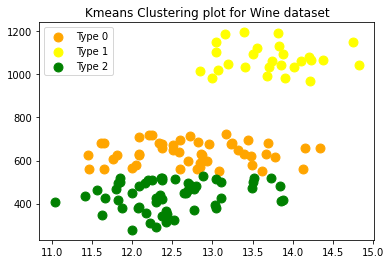

In [10]:
# Visualizing Output
# In the above output we got value labels: ‘0’, ‘1’  and ‘2’. For a better understanding, we can visualize these clusters.

plt.scatter(wine_X[pred_kmeans == 0, 0], wine_X[pred_kmeans == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

In [11]:
# Importing Libraries for Modelling.

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
X, y = wine.data[:, :], wine.target

#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Confusion matrix',  confusion_matrix(y_test, y_pred))
print('Classification', classification_report(y_test, y_pred))

Accuracy Score 0.9555555555555556
Confusion matrix [[21  0  0]
 [ 1 12  0]
 [ 0  1 10]]
Classification               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.92      0.92      0.92        13
           2       1.00      0.91      0.95        11

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.96        45



In [13]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9299065420560748

In [14]:
X, y = wine.data[:, :], wine.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9166666666666666
[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]


/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#cohen kappa accuracy for logistic regression
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8679706601466992

In [17]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.8055555555555556
[[13  0  1]
 [ 0 14  2]
 [ 2  2  2]]


In [18]:
#cohen kappa accuracy k-nn

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.685

In [19]:
#Support Vector Machine
from sklearn.svm import SVC
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.7777777777777778
[[13  0  1]
 [ 0 12  4]
 [ 0  3  3]]


In [20]:
#cohen kappa accuracy svm

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.6513317191283292

In [21]:

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9166666666666666
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]


In [22]:
#cohen kappa accuracy Naive Bayes

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8686131386861313

In [23]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9166666666666666
[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]


In [24]:
#cohen kappa accuracy for Decision trees
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8679706601466992

In [25]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF

classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9166666666666666
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


In [26]:
#cohen kappa accuracy for RF 
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster


0.9555555555555556

In [27]:
# Hierarchical Clustering
''' Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It is aka Hierarchicla 
CLustering Analysis(HCA)'''

# Import Library
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine

In [28]:

# Plotting of Dendrogram

import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance in the space with other variables')

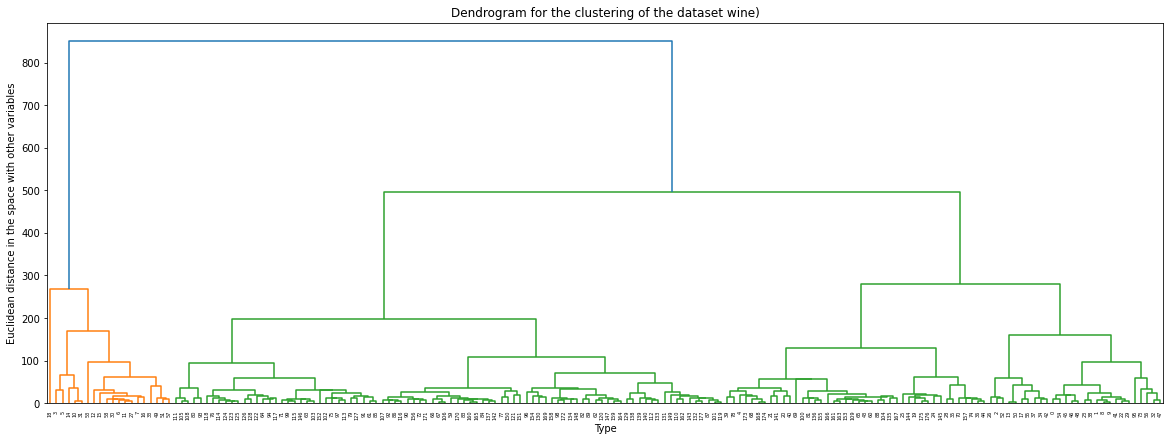

In [29]:
#Decide the number of clusters by using this dendrogram
Z = sch.linkage(wine_X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [30]:
# Building an Agglomerative Clustering Model

#Initialise Model

cluster_H = AgglomerativeClustering(n_clusters=3)
# Modelling the data
model_clt = cluster_H.fit(wine_X)
model_clt
pred1 = model_clt.labels_
pred1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

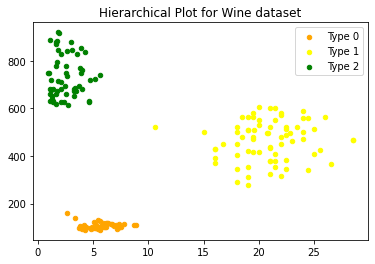

In [31]:
# Plotting the HCA Cluster

plt.scatter(wine_X[pred1 == 0, 9], wine_X[pred1 == 0, 4], s = 20, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred1 == 1, 3], wine_X[pred1 == 1, 12], s = 20, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred1 == 2, 1], wine_X[pred1 == 2, 12], s = 20, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

In [32]:
import sklearn.metrics as sm

target = pd.DataFrame(wine.target)
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(wine_X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.6966292134831461

In [33]:

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9555555555555556

In [34]:
X, y = wine.data[:, :], wine.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [35]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9252336448598131
[[32  2  0]
 [ 4 40  2]
 [ 0  0 27]]


/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8860186418109187

In [37]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.7111111111111111
[[10  1  3]
 [ 1 18  4]
 [ 0  4  4]]


In [38]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.5334928229665072

In [39]:
#Support Vector Machine
from sklearn.svm import SVC
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
classifier = SVC(random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.7777777777777778
[[6 0 0]
 [0 6 1]
 [0 3 2]]


In [40]:

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.6571428571428573

In [41]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  1.0
[[12  0  0]
 [ 0 19  0]
 [ 0  0 14]]


In [42]:

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kapp#Decision Tree Classifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)a_score(y_test, y_pred)
cluster

SyntaxError: invalid syntax (2283961366.py, line 16)

In [43]:

from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

1.0

In [44]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  1.0
[[16  0  0]
 [ 2 12  1]
 [ 0  0 14]]


In [45]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8997772828507795